

# Project: Investigate a Dataset 15 Post Soviet Union Countries, extract from Gapminder World Dataset. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **15 Post Soviet Union Countries**: In December 1991 the Soviet Union, the biggest country in the world, has been dissolved. Up till 1991 it consisted of 15 republics, the independent countries nowdays. The aim of this project is to go through some key metrics and indicators to understand which of post Soviet Union countries are living a good life now days. 
>I chose: GDP (PPP), Life Expactancy and Inflation. 

> Countries are:
1.	Armenia
2.	Azerbaijan
3.	Belarus
4.	Estonia
5.	Georgia
6.	Kazakhstan
7.	Kyrgyzstan
8.	Latvia
9.	Lithuania
10.	Moldova
11.	Russia
12.	Tajikistan
13.	Turkmenistan
14.	Ukraine
15.	Uzbekistan



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling
**About chosen indicators**:
**GDP** - is a Gross Domestic Product. I choose GDP indicator as it is a useful indicator in order to make international comparisons among economic performances of different  countries. However, while comparing 
quality of life among the coutries it is better to take GDP per capita at purchasing power parity (PPP)
as it reflects the differences in costs of living and inflation rates. I take data generated by World Bank, 1991 -2011.

The second indicator is **Life Expactancy** - one of the main indicators of the quality of the health system in the evaluation criteria of the World Health Organization. Available data: 1991-2016.

The third indicator is **Inflation**. I choose this indictaor in matter of the history events. In 1992 Russia had the highest inflation rate ever registered over 1200%.I wonder if other post Soviet Union Countries experienced the same difficulties and which country went over it the fastest. Data available, 1991 -2011.

The origanal files has ',' in the numbers, I change them to '.' in text editor ("Replace:, With: ."), so Python will understand that these are the numeric values. 

### General Properties

In [2]:
# Loading my data of gdp_ppp, life expectancy, inflation rates

#gdp_ppp
df_gdp = pd.read_csv('gdp_ppp.csv', sep = ";",index_col = 0)
df_gdp.head()
                 

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Country,,,,,,,,,,,,,,,,,,,,,
Armenia,2618.271461,1551.268265,1448.155930,1563.387884,1706.192383,1835.300377,1918.844455,2075.962425,2157.289689,2295.358013,...,2860.291798,3262.446256,3601.532202,4096.440119,4631.212472,5260.535273,5614.552099,4810.887720,4900.474333,5112.397885
Azerbaijan,4647.933751,3543.406632,2683.797458,2126.154369,1853.794686,1859.025573,1947.966603,2122.521692,2259.670188,2489.953857,...,2980.840663,3289.675898,3593.625159,4496.143936,5981.242209,7395.156017,8023.568247,8589.563915,8912.370497,8889.890598
Belarus,6353.732759,5731.405284,5283.922416,4671.178065,4198.924437,4330.939282,4845.172504,5277.204636,5475.117427,5810.043576,...,6443.088487,6932.533067,7765.217946,8540.816352,9436.321528,10284.540040,11456.610030,11590.014570,12504.806240,13191.191140
Estonia,NaN,NaN,NaN,NaN,7938.072625,8530.549685,9641.097450,10397.017670,10447.972860,11512.506830,...,13142.719600,14216.531780,15166.073260,16547.960640,18253.443730,19648.449540,18941.290940,16245.561230,16614.647140,17885.429240
Georgia,4809.062567,2629.349816,1844.717924,1669.696568,1759.283677,2006.290029,2258.678705,2351.799232,2438.187066,2502.229079,...,2804.938459,3135.332374,3327.126143,3610.648433,3916.398816,4409.464109,4516.338208,4319.110776,4545.899535,4826.015955


In [3]:
#Transpose the gdp_ppp
df_gdp = df_gdp.T
df_gdp.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyzstan,Latvia,Lithuania,Moldova,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1991,2618.271461,4647.933751,6353.732759,NaN,4809.062567,6270.010807,2287.650623,8877.373006,11770.183720,3839.381156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,1551.268265,3543.406632,5731.405284,NaN,2629.349816,5941.819588,1947.326796,6109.628352,9278.033035,2719.919470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,1448.155930,2683.797458,5283.922416,NaN,1844.717924,5431.076142,1645.809392,5920.797278,7809.436882,2690.181684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,1563.387884,2126.154369,4671.178065,NaN,1669.696568,4816.131131,1315.712041,6152.584138,7095.838122,1864.451026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1706.192383,1853.794686,4198.924437,7938.072625,1759.283677,4499.362002,1231.989611,6181.974808,7385.930219,1847.803322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Life Expactancy
df_life = pd.read_csv('life_ex.csv', sep = ";",index_col = 0)
df_life.head()   


,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Armenia,69.7,68.8,68.3,68.6,69.1,69.4,70.0,70.5,70.8,71.3,...,72.3,72.3,72.6,73.0,73.5,73.9,74.3,74.5,74.7,74.9
Azerbaijan,65.3,63.7,64.0,63.5,64.6,65.0,65.3,65.6,65.9,66.5,...,69.1,69.2,69.7,70.1,70.8,71.5,72.1,72.5,72.9,73.3
Belarus,70.1,69.6,68.9,68.6,68.2,68.1,68.0,67.9,67.7,68.1,...,69.7,70.0,70.1,70.2,70.3,70.4,70.6,70.7,71.0,71.3
Estonia,69.6,69.3,68.2,66.3,67.7,69.8,70.0,69.5,70.2,70.4,...,73.0,74.2,74.9,76.4,76.3,76.7,77.5,77.6,77.8,78.0
Georgia,69.9,69.4,69.2,70.2,70.7,71.2,71.3,71.4,71.4,71.4,...,72.1,71.8,72.1,72.2,72.2,72.4,72.5,72.6,72.9,73.2


In [5]:
#The third indicator is Inflation.

df_inf= pd.read_csv('Inflation_S_U.csv', sep= ";",index_col = 0)
df_inf.head()
df_inf= df_inf.T
df_inf.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kenya,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Rwanda,Tajikistan,Turkmenistan,Ukraine,Uzbekistan,nan
1991,79.39,83.55,103.60,NaN,62.13,96.36,12.53,134.75,162.62,228.34,139.83,128.63,14.98,99.70,102.96,95.62,90.73,NaN
1992,568.81,1065.33,1074.14,NaN,1314.19,1472.22,18.90,830.16,932.52,942.31,945.03,1490.42,7.28,573.80,2773.38,1761.26,712.15,NaN
1993,1391.17,747.57,1053.45,NaN,15442.30,1243.46,25.70,754.43,53.69,306.19,860.46,887.84,13.87,1207.21,1291.67,3334.80,1078.88,NaN
1994,4107.30,1385.20,1945.11,NaN,6041.60,1546.73,17.02,180.87,36.25,61.64,276.44,307.30,17.19,221.05,952.31,953.46,1238.60,NaN
1995,161.16,545.70,661.49,NaN,162.73,160.89,11.22,42.03,27.53,54.20,38.74,144.00,51.27,346.00,705.72,415.81,370.94,NaN




### Data Cleaning (Replace this with more specific notes!)

The overall view of data sets show that there are some missing data in the indicators. In the next section I will clean the messy data, replace not available data, and bring all data frame to the same time period.


In [6]:
#gdp_ppp take away NaN columns
df_gdp_cl= df_gdp[['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
                     'Kyrgyzstan','Latvia', 'Lithuania',
                     'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']]
df_gdp_cl.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyzstan,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
1991,2618.271461,4647.933751,6353.732759,NaN,4809.062567,6270.010807,2287.650623,8877.373006,11770.183720,3839.381156,11961.632240,2691.877921,3474.005360,7369.084342,1950.327787
1992,1551.268265,3543.406632,5731.405284,NaN,2629.349816,5941.819588,1947.326796,6109.628352,9278.033035,2719.919470,10219.009400,1876.521664,3196.980097,6635.243035,1691.761005
1993,1448.155930,2683.797458,5283.922416,NaN,1844.717924,5431.076142,1645.809392,5920.797278,7809.436882,2690.181684,9343.790602,1543.902755,2798.036978,5688.149283,1615.713718
1994,1563.387884,2126.154369,4671.178065,NaN,1669.696568,4816.131131,1315.712041,6152.584138,7095.838122,1864.451026,8179.432344,1197.136229,2255.445094,4405.423362,1501.921031
1995,1706.192383,1853.794686,4198.924437,7938.072625,1759.283677,4499.362002,1231.989611,6181.974808,7385.930219,1847.803322,7850.835818,1033.518788,2046.825073,3898.653432,1461.751614


In [7]:
#INFLATION 
#Right now I have longer time demention, let's make it shorter up to 2011 only.
#make a df only for 00 save as inf_new_dates
new_dates = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007','2008','2009', '2010', '2011']
inf_new_dates= pd.DataFrame.copy(df_inf)
inf_new_dates= df_inf.ix[new_dates]
inf_new_dates.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kenya,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Rwanda,Tajikistan,Turkmenistan,Ukraine,Uzbekistan,nan
2000,-1.37,12.49,185.29,4.79,4.68,17.43,6.08,27.18,4.19,0.94,27.34,37.70,-3.02,22.67,9.80,23.12,47.34,NaN
2001,4.07,2.52,79.53,6.48,5.38,10.16,1.57,7.33,1.70,-0.37,12.09,16.49,1.13,30.21,14.64,9.95,45.19,NaN
2002,2.37,3.12,44.89,4.69,5.92,5.80,0.93,2.03,3.61,0.18,9.83,15.49,-5.10,20.67,8.35,5.12,45.45,NaN
2003,4.56,6.01,30.69,4.04,3.42,11.74,6.20,3.97,3.57,-0.78,14.87,13.78,24.28,27.91,12.14,8.22,26.80,NaN
2004,6.31,8.32,22.68,4.46,8.37,16.13,7.13,5.11,7.01,2.54,7.98,20.28,13.15,17.20,6.03,15.16,15.65,NaN


In [8]:
# taking away NaN data in 00 es
inf_new_dates_cl= inf_new_dates[['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
                     'Kyrgyz Republic','Latvia', 'Lithuania',
                     'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']]
inf_new_dates_cl.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
2000,-1.37,12.49,185.29,4.79,4.68,17.43,27.18,4.19,0.94,27.34,37.70,22.67,9.80,23.12,47.34
2001,4.07,2.52,79.53,6.48,5.38,10.16,7.33,1.70,-0.37,12.09,16.49,30.21,14.64,9.95,45.19
2002,2.37,3.12,44.89,4.69,5.92,5.80,2.03,3.61,0.18,9.83,15.49,20.67,8.35,5.12,45.45
2003,4.56,6.01,30.69,4.04,3.42,11.74,3.97,3.57,-0.78,14.87,13.78,27.91,12.14,8.22,26.80
2004,6.31,8.32,22.68,4.46,8.37,16.13,5.11,7.01,2.54,7.98,20.28,17.20,6.03,15.16,15.65


In [9]:
#create a seperate df for 90es inflation rates, save as inf_old_dates 
old_dates = ['1991','1992', '1993', '1994', '1995', '1996', '1997', '1998','1999']
inf_old_dates= pd.DataFrame.copy(df_inf)
inf_old_dates= df_inf.ix[old_dates]
inf_old_dates.head()


Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kenya,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Rwanda,Tajikistan,Turkmenistan,Ukraine,Uzbekistan,nan
1991,79.39,83.55,103.60,NaN,62.13,96.36,12.53,134.75,162.62,228.34,139.83,128.63,14.98,99.70,102.96,95.62,90.73,NaN
1992,568.81,1065.33,1074.14,NaN,1314.19,1472.22,18.90,830.16,932.52,942.31,945.03,1490.42,7.28,573.80,2773.38,1761.26,712.15,NaN
1993,1391.17,747.57,1053.45,NaN,15442.30,1243.46,25.70,754.43,53.69,306.19,860.46,887.84,13.87,1207.21,1291.67,3334.80,1078.88,NaN
1994,4107.30,1385.20,1945.11,NaN,6041.60,1546.73,17.02,180.87,36.25,61.64,276.44,307.30,17.19,221.05,952.31,953.46,1238.60,NaN
1995,161.16,545.70,661.49,NaN,162.73,160.89,11.22,42.03,27.53,54.20,38.74,144.00,51.27,346.00,705.72,415.81,370.94,NaN


In [10]:
# taking away NaN data in 90 es
inf_old_dates_cl= inf_old_dates[['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
                     'Kyrgyz Republic','Latvia', 'Lithuania',
                     'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']]
inf_old_dates_cl.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
1991,79.39,83.55,103.60,NaN,62.13,96.36,134.75,162.62,228.34,139.83,128.63,99.70,102.96,95.62,90.73
1992,568.81,1065.33,1074.14,NaN,1314.19,1472.22,830.16,932.52,942.31,945.03,1490.42,573.80,2773.38,1761.26,712.15
1993,1391.17,747.57,1053.45,NaN,15442.30,1243.46,754.43,53.69,306.19,860.46,887.84,1207.21,1291.67,3334.80,1078.88
1994,4107.30,1385.20,1945.11,NaN,6041.60,1546.73,180.87,36.25,61.64,276.44,307.30,221.05,952.31,953.46,1238.60
1995,161.16,545.70,661.49,NaN,162.73,160.89,42.03,27.53,54.20,38.74,144.00,346.00,705.72,415.81,370.94


In [11]:
# To plot the indicators I need to transpose data frame
# transpose df of Life Expactancy indicator
df_life= df_life.T
df_life.head()



Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Germany,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1991,69.7,65.3,70.1,69.6,69.9,75.6,67.6,65.9,69.1,70.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,68.8,63.7,69.6,69.3,69.4,76.0,67.1,65.6,68.4,70.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,68.3,64.0,68.9,68.2,69.2,76.1,65.3,65.3,66.7,69.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,68.6,63.5,68.6,66.3,70.2,76.4,64.6,65.0,65.7,68.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,69.1,64.6,68.2,67.7,70.7,76.6,63.6,65.1,66.5,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#It shows that after the last country we have a lot of empty spaces that count as NaN. 
#Let's make a df with only needed values

df_life_cl= df_life[['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
                     'Kyrgyz Republic','Latvia', 'Lithuania',
                     'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']]
df_life_cl.head()

Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
1991,69.7,65.3,70.1,69.6,69.9,67.6,65.9,69.1,70.5,67.4,69.1,65.3,63.5,69.4,67.6
1992,68.8,63.7,69.6,69.3,69.4,67.1,65.6,68.4,70.3,67.6,68.0,62.6,63.5,68.8,67.3
1993,68.3,64.0,68.9,68.2,69.2,65.3,65.3,66.7,69.1,67.4,65.2,64.2,63.5,68.3,67.0
1994,68.6,63.5,68.6,66.3,70.2,64.6,65.0,65.7,68.7,65.8,63.8,64.1,63.4,67.5,66.7
1995,69.1,64.6,68.2,67.7,70.7,63.6,65.1,66.5,69.0,65.4,64.4,64.1,63.3,66.5,66.6


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What country had the longest Life Expactancy  in average?
AND
### What country had the longest Life Expactancy  2000 es in average?
**Life Expactancy** is important indicator to look at. My hypohesis is that as there were 2 wars in Russia during 90es (First Chechen War (1994-1996) and Second Chechen war (1999-2000)), 2 years Georgian Civil War (1991-1993), Tajikistani Civil War (1992-1997), and many others smaller military conflicts that took away people's lifes and these historical events has influenced the numbers a lot. I think that all these events of 90es  affect the indicator, so state a question keeping in mind the 2000es years that were more peaceful for all Post Soviet Union Countries. However, I will perform both calculations 1991 -2011 and just 2000-2011 to see if I am right about war influences on the Life Expactancy indicator. 

In [13]:
#What country has the longest life expactancy in average?
#Find the average per country and sort it out from the lowest to the highest value
df_life_sorted = df_life_cl.mean().sort_values()
df_life_cl.mean().sort_values()

Country
Turkmenistan       65.811538
Kyrgyz Republic    66.195238
Kazakhstan         66.553846
Russia             67.319231
Tajikistan         67.565385
Azerbaijan         67.988462
Ukraine            68.707692
Uzbekistan         68.742308
Belarus            69.226923
Moldova            69.711538
Latvia             71.150000
Georgia            71.550000
Armenia            71.626923
Lithuania          72.146154
Estonia            72.430769
dtype: float64

Text(0.5,1,'Life Expectancy Average')

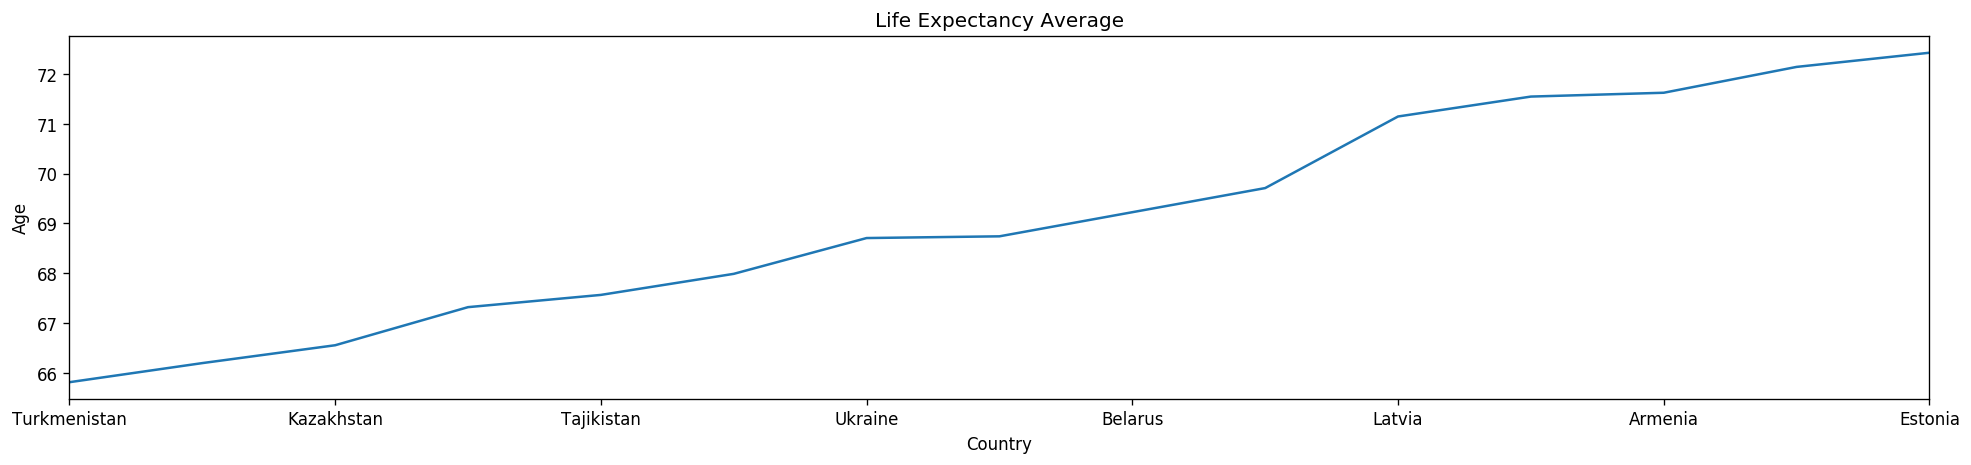

In [14]:
df_life_avg= df_life_sorted
fig=plt.figure(figsize=(20, 4), dpi=120)
x = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan','Kyrgyz Republic','Latvia', 'Lithuania','Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
df_life_avg.plot()
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Life Expectancy Average')

In [15]:
#What is the max ever reached value for every country in Life Expactancy?
df_life_max= df_life_cl.max().sort_values()
df_life_cl.max().sort_values()


Country
Kyrgyz Republic    68.5
Kazakhstan         70.2
Turkmenistan       70.4
Russia             71.1
Belarus            71.3
Ukraine            71.7
Uzbekistan         72.1
Tajikistan         72.9
Georgia            73.2
Azerbaijan         73.3
Moldova            74.2
Armenia            74.9
Lithuania          75.4
Latvia             75.6
Estonia            78.0
dtype: float64

Text(0.5,1,'Life Expectancy Max')

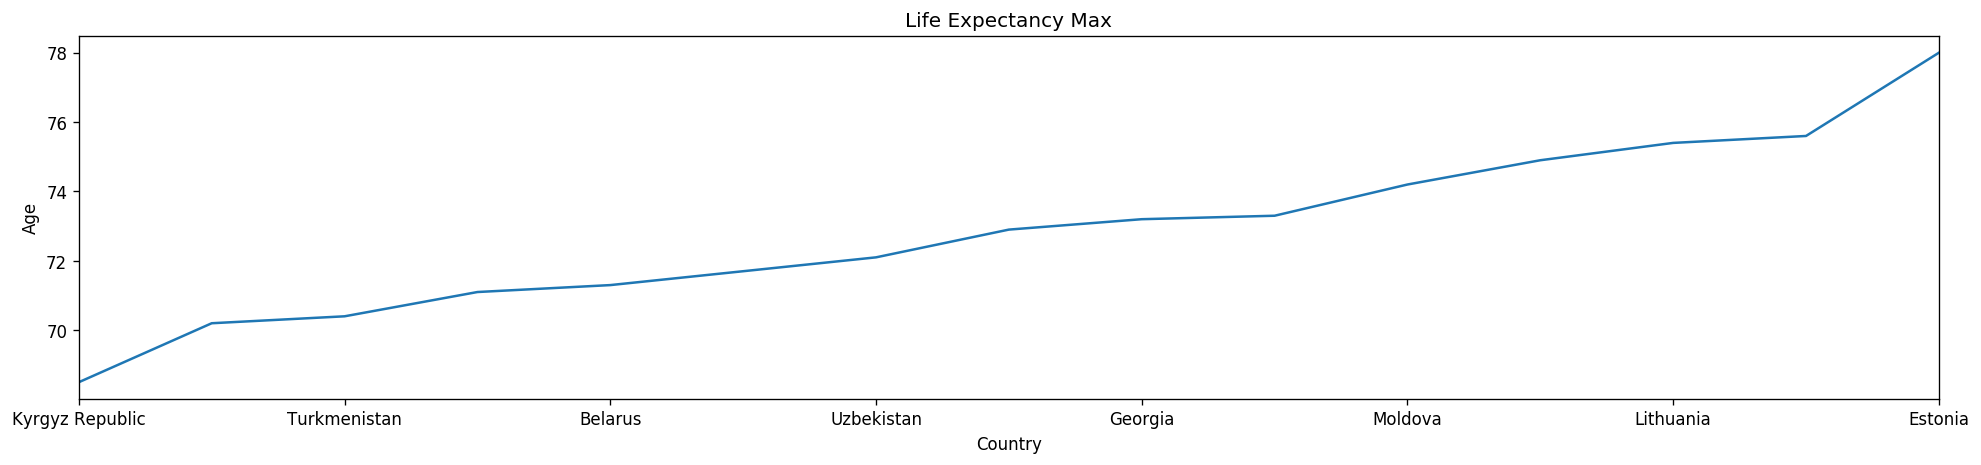

In [16]:
#Plot the max Life Expactancy

fig=plt.figure(figsize=(20, 4), dpi=120)

#configure  X axes
plt.xticks=(['Armenia', 'Azerbaijan', 'Belarus', 'Estonia', 'Georgia', 'Kazakhstan',
                     'Kyrgyz Republic','Latvia', 'Lithuania',
                     'Moldova', 'Russia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan'])
plot_life =df_life_max.plot()
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Life Expectancy Max')




### Life Expactancy 
**Result #1**: The highest Life Expactancy value of 78 years ever registered among Post Soviet Union countries belongs **Estonia** and the lowest to **Kyrgyz Republic** with value of 68.5 years.
At the same time when we look at the average Life Expactancy rate through the years has also **Estonia** 72.4 years the next one is **Lithuania 72.1**. The lowest average score belongs to **Turkmenistan** 65.8 and **Kyrgyz Republic** 66.2.

Text(0.5,1,'Life Expectancy All 15 Countries')

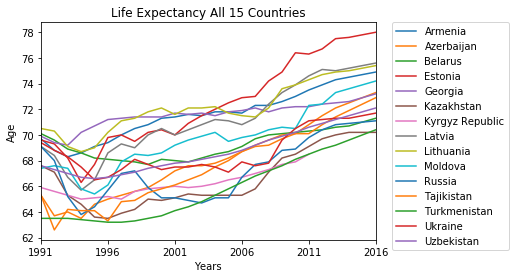

In [17]:
#plot all countries data at the same plot
df_life_cl.plot()

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years')
plt.ylabel('Age')
plt.title('Life Expectancy All 15 Countries')



### Life Expactancy 
**Result #2**: On the plot right about we see that all countries at the beginning of 1991 had approximately the same interval of a starting  point: from 63 to 71 years old.Some countries however managed to make a huge development from 69 years old to 78 like the leader Life Expectance exploration **Estonia**.  
**Suggestion for future explorations**: There is a room for exploration about other countries that started low, but also manage to increase there Life Expactancy rate for a decade for the period of 20 years. 

In [18]:
#Make a new data frame with only 2000s data
new_dates = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007','2008','2009', '2010', '2011']
life_ex_new_dates= pd.DataFrame.copy(df_life_cl)
life_ex_new_dates = df_life_cl.ix[new_dates]
life_ex_new_dates.head()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
2000,71.3,66.5,68.1,70.4,71.4,64.9,65.9,70.5,72.1,68.6,65.1,65.8,63.7,67.3,67.6
2001,71.4,67.2,68.0,70.0,71.7,65.1,66.0,70.0,71.6,69.2,65.1,66.1,64.1,67.5,67.8
2002,71.6,67.6,67.9,70.9,71.6,65.4,65.9,70.4,72.1,69.6,64.9,66.5,64.4,67.5,67.9
2003,71.5,67.6,68.2,71.5,71.7,65.3,66.0,70.8,72.1,69.9,64.7,66.9,64.8,67.7,68.1
2004,71.8,67.8,68.5,72.0,71.5,65.3,66.2,71.2,72.2,70.2,65.1,67.5,65.3,67.5,68.3


In [19]:
#What country had the longest life expactancy  2000 es in average?
#Find mean value of coutries in 2000es

life_ex_new_dates.mean().sort_values()

Country
Turkmenistan       66.050000
Kazakhstan         66.275000
Russia             66.650000
Kyrgyz Republic    66.800000
Tajikistan         68.208333
Ukraine            68.258333
Azerbaijan         68.541667
Uzbekistan         68.875000
Belarus            69.066667
Moldova            70.050000
Latvia             71.691667
Georgia            71.833333
Armenia            72.066667
Lithuania          72.383333
Estonia            72.916667
dtype: float64

Text(0.5,1,'Life Expectancy 2000 es All Countries')

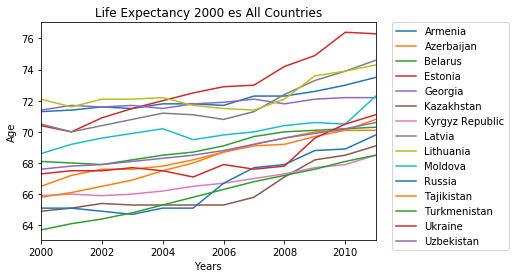

In [20]:
#plot all countries data at the same plot
life_ex_new_dates.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Place a legend to the right of this smaller subplot.
plt.xlabel('Years')
plt.ylabel('Age')
plt.title('Life Expectancy 2000 es All Countries')



In [21]:
#Select Estonia, find average
estonia_life= df_life_cl[[ 'Estonia']]
estonia_life.mean()




Country
Estonia    72.430769
dtype: float64

In [22]:
#find Estonia's median for new years
estonia_life.median()

Country
Estonia    71.75
dtype: float64

Text(0,0.5,'Frequency')

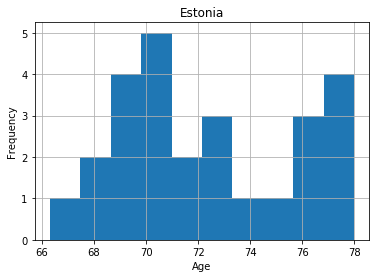

In [23]:
#Let's create a histogram for the winner Estonia, to see the age distribution through the years
estonia_life.hist()
plt.xlabel("Age")
plt.ylabel("Frequency")

**Histogram**

**Shape**: The distribution of ages is skewed right. We have a concentration of data among the younger ages and not a very distinctive tail to the right. Estonia's median < than Estonia's mean value, therefore histogram is right skewed.

**Center**: The data seems to be centered around 69 or 71 years old.

### Life Expactancy 
**Result #3**: My hypothesis is not supported. The leader for the whole period and in 2000es is the same. But maybe countries need more time? It is another possible question for future explorations.

**Interesting Findings**: In 1991 the leader **Estonia** had a Life Expactancy rate at 69.6 when in 2000, 9 years later only 70.4. When in the end of 2011 - 76 years. It means that the period 2000-2011 brought the biggest development to **Estonia's** position in the rating. Untill 2004 **Lithuania** was a leader and had 72.2 Life Expactancy in comparison with **Estonia's** 72. 

**Suggestion for future explorations:** Were there other countries which had similar way of development as **Estonia**? Were there countries that had more development in 90s then in 00es? What has happend with Lithanian and Estonian medical systems that change countries' Life Expactancy ratings?


### Inflation 

**What country had the biggest Inflation rate 1991-1999 and 2000-2011 in average?**

AND

**How the crisis of 2008 influenced the countries with lowest inflation rate in 2000es?**

In [24]:
#view the 90s data
inf_old_dates_cl


Country,Armenia,Azerbaijan,Belarus,Estonia,Georgia,Kazakhstan,Kyrgyz Republic,Latvia,Lithuania,Moldova,Russia,Tajikistan,Turkmenistan,Ukraine,Uzbekistan
1991,79.39,83.55,103.60,NaN,62.13,96.36,134.75,162.62,228.34,139.83,128.63,99.70,102.96,95.62,90.73
1992,568.81,1065.33,1074.14,NaN,1314.19,1472.22,830.16,932.52,942.31,945.03,1490.42,573.80,2773.38,1761.26,712.15
1993,1391.17,747.57,1053.45,NaN,15442.30,1243.46,754.43,53.69,306.19,860.46,887.84,1207.21,1291.67,3334.80,1078.88
1994,4107.30,1385.20,1945.11,NaN,6041.60,1546.73,180.87,36.25,61.64,276.44,307.30,221.05,952.31,953.46,1238.60
1995,161.16,545.70,661.49,NaN,162.73,160.89,42.03,27.53,54.20,38.74,144.00,346.00,705.72,415.81,370.94
1996,19.59,26.42,53.72,24.14,43.03,38.90,35.34,14.87,19.02,26.94,45.80,430.55,1174.29,66.15,81.56
1997,17.74,9.24,71.65,10.24,6.54,16.14,19.31,6.97,11.85,12.55,15.06,65.23,61.56,18.07,66.09
1998,10.70,-0.96,76.58,5.15,6.94,5.66,9.08,4.60,3.23,5.60,18.54,87.83,18.07,12.01,39.00
1999,0.05,2.16,316.79,6.77,9.73,13.28,37.57,4.37,-1.45,44.88,72.39,26.51,23.06,27.40,44.12


In [25]:
#Find the average of Inflation in 90 es 

inf_old_dates_cl.mean().sort_values()


Country
Estonia              11.575000
Latvia              138.157778
Lithuania           180.592222
Kyrgyz Republic     227.060000
Moldova             261.163333
Tajikistan          339.764444
Russia              345.553333
Uzbekistan          413.563333
Azerbaijan          429.356667
Kazakhstan          510.404444
Belarus             595.170000
Armenia             706.212222
Ukraine             742.731111
Turkmenistan        789.224444
Georgia            2565.465556
dtype: float64

**Interesting Findings**: Here we have the same leader, **Estonia** with extremely low inflation rate for 90es of 11%. 
However, **Estonia** is the only one of explored countries which is missing data during 1991-1995, when all other countries were struggeling with the highes inflations rates ever in their history. 

**Suggestion for future explorations:** Take away 1991-1995 period without Estonia and have a look who did the best during these crazy times in economic history. 



In [26]:
#Find the average of Inflation in 00 es 
inf_new_dates_cl.mean().sort_values()


Country
Lithuania           3.172500
Armenia             4.164167
Estonia             5.006667
Latvia              6.367500
Georgia             6.610000
Azerbaijan         10.008333
Kyrgyz Republic    10.843333
Moldova            11.722500
Turkmenistan       12.272500
Kazakhstan         14.815833
Ukraine            16.239167
Russia             16.620833
Tajikistan         20.223333
Uzbekistan         26.883333
Belarus            41.828333
dtype: float64

In [27]:
#Choose the leading countries with average inflation rates under 10%
inf_winners= inf_new_dates_cl[['Armenia', 'Estonia', 'Georgia', 'Latvia', 'Lithuania']]
inf_winners

Country,Armenia,Estonia,Georgia,Latvia,Lithuania
2000,-1.37,4.79,4.68,4.19,0.94
2001,4.07,6.48,5.38,1.70,-0.37
2002,2.37,4.69,5.92,3.61,0.18
2003,4.56,4.04,3.42,3.57,-0.78
2004,6.31,4.46,8.37,7.01,2.54
2005,3.24,6.06,7.93,10.17,6.61
2006,4.62,8.77,8.48,9.88,6.54
2007,4.23,11.64,9.69,20.30,8.50
2008,5.99,5.33,9.71,14.38,9.77
2009,2.56,-1.00,-2.01,-1.50,-3.71


Text(0.5,1,'Inflation Rate 2000es Best Performed Coutries')

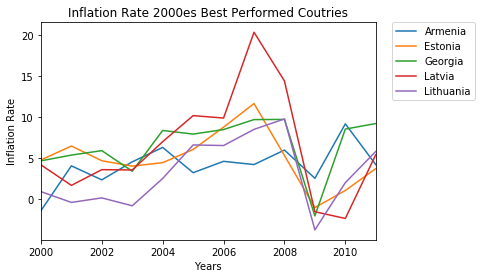

In [28]:
#Plot the winning in inflation in 00es countries
inf_winners.plot()

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate 2000es Best Performed Coutries')


Text(0.5,1,'Inflation Rate 2000es Best Performed Coutries')

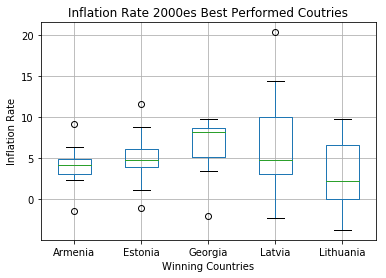

In [37]:
#boxplot countries with best inflation rates
inf_winners.boxplot()
plt.xlabel('Winning Countries')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate 2000es Best Performed Coutries')


**Results of Inflation research**: The winners in 00es with inflation lower then 10% are: Armenia,Estonia, Georgia, Latvia and Lithuania. The most affected on inflation rate coutry by Financial Crisis of 2008 is **Latvia** (20% inflation rate in 2007 and 14.2 % in 2008, see the outliers on the boxplot). The next after Latvia was **Estonia** with 11.6% of inflation rate in 2007. **Armenia** and **Georgia** experienced difficulties in 2010. A boxplot figure shows the amount distributions in the countries' rates and visuality of the inflation range among winners. 

# GDP PPP
**What country had the biggest GDP_PPP rate 1991 - 2011 in average?**

In [30]:
#Find the average of gdp_ppp
df_gdp_cl.mean().sort_values()

Country
Tajikistan       1405.475136
Kyrgyzstan       1695.896106
Uzbekistan       1912.671768
Moldova          2280.918834
Armenia          3135.426518
Georgia          3158.195802
Turkmenistan     3900.077609
Azerbaijan       4304.840095
Ukraine          5105.213238
Kazakhstan       7206.821227
Belarus          7439.455553
Latvia          10084.592927
Russia          10607.978919
Lithuania       11694.791295
Estonia         13965.504009
dtype: float64

**Result #1**: Here we can see that **Estonia** is leading again, the next are **Lithuania**, **Russia** and **Latvia**. 
Worth to mention that at the international ratings up 2016 the highest in the rating from Post Soviet Union countries is **Lithuania** (#63), then right after it **Estonia**(# 64), **Russia** (#72) and **Latvia** (#74). (Link https://www.cia.gov/library/publications/the-world-factbook/rankorder/2004rank.html)

In [31]:
#Let's choose Estonia, Lithania, Russia and Latvia and save as a new df gdp_winners
gdp_winners= df_gdp_cl[[ 'Estonia',  'Latvia', 'Lithuania', 'Russia']]
gdp_winners

Country,Estonia,Latvia,Lithuania,Russia
1991,NaN,8877.373006,11770.183720,11961.632240
1992,NaN,6109.628352,9278.033035,10219.009400
1993,NaN,5920.797278,7809.436882,9343.790602
1994,NaN,6152.584138,7095.838122,8179.432344
1995,7938.072625,6181.974808,7385.930219,7850.835818
1996,8530.549685,6489.008016,7828.012682,7588.798928
1997,9641.097450,7096.866463,8474.998781,7717.766162
1998,10397.017670,7502.445171,9187.860603,7328.874682
1999,10447.972860,7919.189185,9153.969997,7829.368262
2000,11512.506830,8529.143493,9518.255249,8612.658286


Text(0.5,1,'Countries with the Highest GDP (PPP) rate')

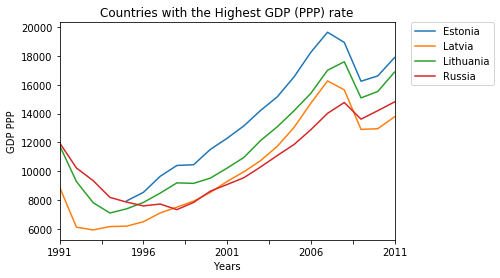

In [32]:
#Now let's plot the winning in gdp countries
gdp_winners.plot()

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years')
plt.ylabel('GDP PPP')
plt.title('Countries with the Highest GDP (PPP) rate')


**Result #2**: Here we can see how much alike was a development of gdp ppp  in these winning countries. We also can see the simultanious drop in 2007-2009.

**Suggestion for future explorations**:It would be interesting to look closer at the drop in 2007-2009 in these countries. We already notised performing analysis on Inflation that 2007 was the year when crisis started. Here we can also see the drop of the gdp_ppp already in 2007. I suggest to explore other indicators to find the similarities in them in 2007 and 2006. 


<a id='wrangling'></a>
## Conclusions

Soviet Union was my mother land. I and many my friends were born in the same country but grew up in a totally different ones with different mother languages, economies and presidents. 
My research shows that the coutries with highest standards of living among Post Soviet Union countries are Baltic countries: **Estonia**, **Latvia** and **Lithuania** (based on data from 1991 -2011).

>**Limitations** 
Estonia is missing data in 1991 -1995 that reflects on it's presentation in a positive way. Cause these years were the most challenging in the Post Soviet Union countires history. At the same time the data set explored 